In [10]:
import pandas as pd
import numpy as np
import gc 

import xgboost
from sklearn.preprocessing import LabelEncoder

# 회원정보

In [71]:
import pandas as pd

df = pd.read_csv('1_회원정보_merged.csv')
df.columns

Index(['Unnamed: 0', '기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능',
       '회원여부_이용가능_CA', '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용',
       '소지카드수_이용가능_신용', '입회일자_신용', '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론',
       '동의여부_한도증액안내', '수신거부여부_TM', '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS',
       '가입통신회사코드', '탈회횟수_누적', '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내',
       '거주시도명', '직장시도명', '마케팅동의여부', '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족',
       '유효카드수_체크', '유효카드수_체크_가족', '이용가능카드수_신용체크', '이용가능카드수_신용',
       '이용가능카드수_신용_가족', '이용가능카드수_체크', '이용가능카드수_체크_가족', '이용카드수_신용체크',
       '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', '이용금액_R3M_신용체크',
       '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족',
       '_1순위카드이용금액', '_1순위카드이용건수', '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수',
       '_2순위신용체크구분', '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자',
       '보유여부_해외겸용_본인', '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회

---

기본 정보 그룹:
- 기준년월, ID, 남녀구분코드, 연령

회원 상태 및 신용 관련 그룹:
- 회원여부_이용가능_카드론, 소지여부_신용, 소지카드수_유효_신용, 소지카드수_이용가능_신용, 입회일자_신용, 입회경과개월수_신용, 회원여부_연체

이용 및 거래 거절 관련 그룹:
- 이용거절여부_카드론, 탈회횟수_누적, 최종탈회후경과월

카드 사용 가능성 및 사용 패턴 그룹:
- 이용가능카드수_신용체크, 이용금액_R3M_신용체크, 이용금액_R3M_신용, 이용금액_R3M_신용_가족, 이용금액_R3M_체크, 이용금액_R3M_체크_가족

주요 카드 사용 내역 그룹:
- _1순위카드이용금액, _1순위카드이용건수, _1순위신용체크구분

### 기본 정보 그룹
---

In [74]:
# 기본 정보 그룹
columns_to_select = [
    "기준년월",
    "ID",
    "남녀구분코드",
    "연령"
]

filtered_df = df[columns_to_select]
print(filtered_df.head())


     기준년월            ID  남녀구분코드   연령
0  201807  TRAIN_000000       2  40대
1  201807  TRAIN_000001       1  30대
2  201807  TRAIN_000002       1  30대
3  201807  TRAIN_000003       2  40대
4  201807  TRAIN_000004       2  40대


### 기본 통계 요약 
---

#### 연령 분포 시각화

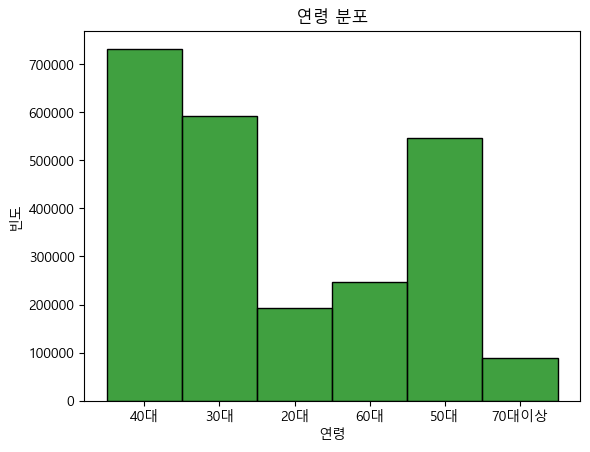

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

sns.histplot(filtered_df["연령"], bins=10, color="green")
plt.title("연령 분포")
plt.xlabel("연령")
plt.ylabel("빈도")
plt.show()

### 남녀 비율 확인

In [76]:
gender_counts = filtered_df["남녀구분코드"].value_counts()
print("남녀 비율:\n", gender_counts)

남녀 비율:
 남녀구분코드
1    1255308
2    1144692
Name: count, dtype: int64


#### 남녀 비율 시각화

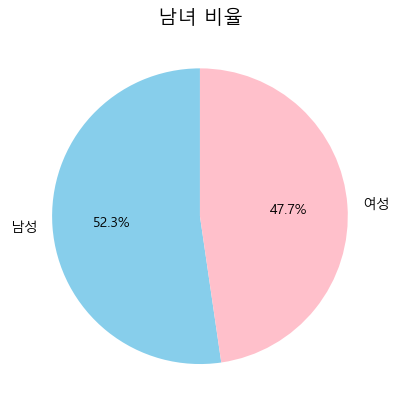

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 남녀 비율 계산
gender_counts = df["남녀구분코드"].value_counts()

# 파이 차트 생성
fig, ax = plt.subplots()
gender_labels = ["남성", "여성"]
ax.pie(
    gender_counts,
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "pink"]
)
ax.set_title("남녀 비율", fontsize=14)  # 제목 설정
plt.show()


### 기준년월별 데이터 개수 확인

In [78]:
month_counts = filtered_df["기준년월"].value_counts()
print("기준년월별 데이터 개수:\n", month_counts)

기준년월별 데이터 개수:
 기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64


기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64


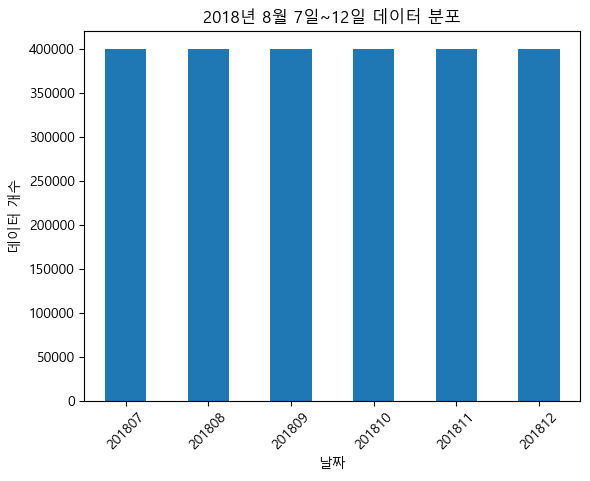

In [79]:
# 날짜별 데이터 개수 집계
date_counts = filtered_df['기준년월'].value_counts().sort_index()

# 결과 출력
print(date_counts)

# 시각화 (막대그래프)
date_counts.plot(kind='bar')
plt.xlabel('날짜')
plt.ylabel('데이터 개수')
plt.title('2018년 8월 7일~12일 데이터 분포')
plt.xticks(rotation=45)
plt.show()

### 회원 상태 및 신용 관련 그룹
---

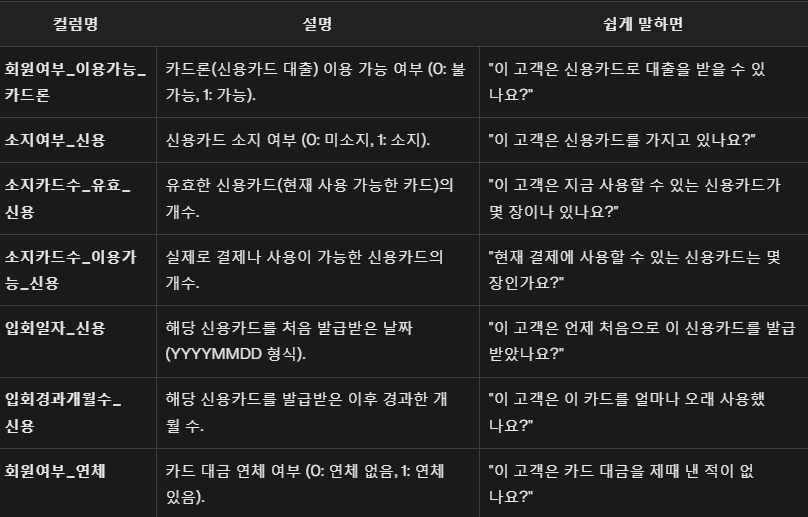

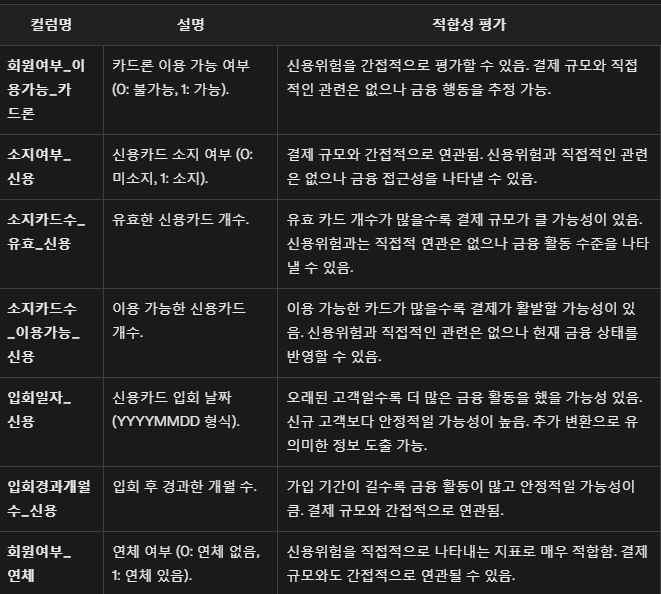

In [80]:
# 회원 상태 및 신용 관련 그룹:

columns_to_select = [
    "회원여부_이용가능_카드론",
    "소지여부_신용",
    "소지카드수_유효_신용",
    "소지카드수_이용가능_신용",
    "입회일자_신용",
    "입회경과개월수_신용",
    "회원여부_연체"
]

filtered_df = df[columns_to_select]
pd.set_option('display.max_rows', 20)
print(filtered_df.head())

   회원여부_이용가능_카드론  소지여부_신용  소지카드수_유효_신용  소지카드수_이용가능_신용   입회일자_신용  입회경과개월수_신용  \
0              0        1            1              1  20130101          67   
1              1        1            1              1  20170801          12   
2              0        1            1              1  20080401         124   
3              0        1            2              2  20160501          27   
4              1        1            1              1  20180601           2   

   회원여부_연체  
0        0  
1        0  
2        0  
3        0  
4        0  


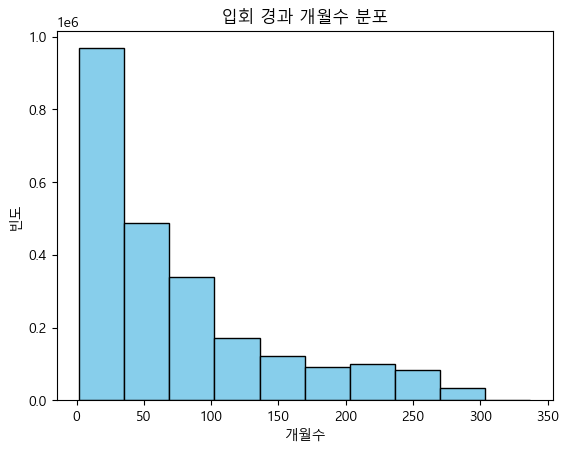

In [81]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(df['입회경과개월수_신용'], bins=10, color='skyblue', edgecolor='black')
plt.title('입회 경과 개월수 분포')
plt.xlabel('개월수')
plt.ylabel('빈도')
plt.show()


### 이용 및 거래 거절 관련 그룹
---

In [12]:
# 이용 및 거래 거절 관련 그룹
columns_to_select = [
    "이용거절여부_카드론",
    "탈회횟수_누적",
    "최종탈회후경과월"
]


filtered_df = df[columns_to_select]
pd.set_option('display.max_rows', 20)
print(filtered_df.head())


   이용거절여부_카드론  탈회횟수_누적  최종탈회후경과월
0           1        1       105
1           0        2        25
2           0        2       106
3           0        0         0
4           0        0         0


### 카드 사용 가능성 및 사용 패턴 그룹
---

In [10]:
# 카드 사용 가능성 및 사용 패턴 그룹
columns_to_select = [
    "이용가능카드수_신용체크",
    "이용금액_R3M_신용체크",
    "이용금액_R3M_신용",
    "이용금액_R3M_신용_가족",
    "이용금액_R3M_체크",
    "이용금액_R3M_체크_가족"
]


filtered_df = df[columns_to_select]
pd.set_option('display.max_rows', 20)
print(filtered_df.head())


   이용가능카드수_신용체크  이용금액_R3M_신용체크  이용금액_R3M_신용  이용금액_R3M_신용_가족  이용금액_R3M_체크  \
0             2          18938        18938            7897            0   
1             2          11757         5413               0         6344   
2             2          40339        40339               0            0   
3             1           7559         7559               0            0   
4             3          12863        11352               0         1511   

   이용금액_R3M_체크_가족  
0               0  
1               0  
2               0  
3               0  
4               0  


### 주요 카드 사용 내역 그룹
---

In [16]:
# 주요 카드 사용 내역 그룹
columns_to_select = [
    "_1순위카드이용금액",
    "_1순위신용체크구분",
    "_1순위카드이용건수"
]


filtered_df = df[columns_to_select]
print(filtered_df.tail(10))


       _1순위카드이용금액 _1순위신용체크구분  _1순위카드이용건수
99990       21385         신용          27
99991       18506         신용          22
99992       16342         신용          17
99993       12652         신용          57
99994       29020         신용          15
99995           0       None          -2
99996        1231         신용           4
99997           0         신용           6
99998       63592         신용         185
99999        -574         신용           0


# 신용정보

In [20]:
import pandas as pd

train = pd.read_csv('2_신용정보_merged.csv')
train.columns

Index(['Unnamed: 0', '기준년월', 'ID', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액',
       '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전',
       'RV신청일자', 'RV약정청구율', 'RV최소결제비율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M',
       '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월',
       '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액',
       '카드론동의여부', '월상환론상향가능한도금액', 'RV전환가능여부', '일시불ONLY전환가능여부', '카드이용한도금액_B1M',
       '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수',
       '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', '시장단기연체여부_R3M',
       '시장연체상환여부_R6M', '시장연체상환여부_R3M', 'rv최초시작후경과일'],
      dtype='object')

In [29]:
# 카드 사용 가능성 및 사용 패턴 그룹
columns_to_select = [
    "최초한도금액",
    "카드이용한도금액"
]


filtered_df = train[columns_to_select]
##pd.set_option('display.max_rows', 20)
print(filtered_df.tail())

         최초한도금액  카드이용한도금액
2399995       0     20070
2399996       0     84217
2399997       0     52612
2399998       0     10002
2399999       0     86094


# 승인매출정보

In [23]:
import pandas as pd

# 데이터 읽기
train = pd.read_parquet('test\\3.승인매출정보\\201807_test_승인매출정보.parquet')

# 모든 컬럼을 표시하도록 설정
pd.options.display.max_columns = None

# 컬럼 확인
print(train.columns)


Index(['기준년월', 'ID', '최종이용일자_기본', '최종이용일자_신판', '최종이용일자_CA', '최종이용일자_카드론',
       '최종이용일자_체크', '최종이용일자_일시불', '최종이용일자_할부', '이용건수_신용_B0M',
       ...
       '승인거절건수_한도초과_B0M', '승인거절건수_BL_B0M', '승인거절건수_입력오류_B0M', '승인거절건수_기타_B0M',
       '승인거절건수_R3M', '승인거절건수_한도초과_R3M', '승인거절건수_BL_R3M', '승인거절건수_입력오류_R3M',
       '승인거절건수_기타_R3M', '이용금액대'],
      dtype='object', length=406)


# 청구입금정보

In [14]:
import pandas as pd

train = pd.read_parquet('test\\4.청구입금정보\\201807_test_청구정보.parquet')
train.columns

Index(['기준년월', 'ID', '대표결제일', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드',
       '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0',
       '청구금액_R3M', '청구금액_R6M', '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M',
       '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M',
       '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M',
       '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M',
       '포인트_잔여포인트_B0M', '마일_적립포인트_R12M', '마일_적립포인트_R3M', '마일_이용포인트_R12M',
       '마일_이용포인트_R3M', '마일_잔여포인트_B0M', '할인건수_R3M', '할인금액_R3M', '할인건수_B0M',
       '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '상환개월수_결제일_R6M',
       '상환개월수_결제일_R3M', '선결제건수_R6M', '선결제건수_R3M', '연체건수_R6M', '연체건수_R3M',
       '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M', '혜택수혜금액'],
      dtype='object')

# 잔액정보

In [15]:
import pandas as pd

train = pd.read_parquet('test\\5.잔액정보\\201807_test_잔액정보.parquet')
train.columns

Index(['기준년월', 'ID', '잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M',
       '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '월중평잔_일시불_B0M',
       '월중평잔_할부_B0M', '월중평잔_CA_B0M', '카드론잔액_최종경과월', '연체일자_B0M', '연체잔액_B0M',
       '연체잔액_일시불_B0M', '연체잔액_할부_B0M', '연체잔액_현금서비스_B0M', '연체잔액_카드론_B0M',
       '연체잔액_대환론_B0M', '잔액_현금서비스_B1M', '잔액_현금서비스_B2M', '잔액_카드론_B1M',
       '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M', '잔액_할부_B1M',
       '잔액_할부_B2M', '잔액_일시불_B1M', '잔액_일시불_B2M', '연체일수_B1M', '연체일수_B2M',
       '연체원금_B1M', '연체원금_B2M', '연체일수_최근', '연체원금_최근', '최종연체회차', '매각잔액_B1M',
       '최종연체개월수_R15M', 'RV_평균잔액_R12M', 'RV_최대잔액_R12M', 'RV_평균잔액_R6M',
       'RV_최대잔액_R6M', 'RV_평균잔액_R3M', 'RV_최대잔액_R3M', 'RV잔액이월횟수_R6M',
       'RV잔액이월횟수_R3M', '잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M',
       '연체잔액_일시불_해외_B0M', '연체잔액_RV일시불_B0M', '연체잔액_RV일시불_해외_B0M',
       '연체잔액_할부_해외_B0M', '연체잔액_CA_B0M', '연체잔액_CA_해외_B0M', '월중평잔', '월중평잔_일시불',
       '월중평잔_RV일시불', '월중평잔_할부', '월중평잔_CA', '월중평잔_카드론', '평잔_3M', '평잔_

# 채널정보

In [ ]:
import pandas as pd

train = pd.read_parquet('test\\6.채널정보\\201807_test_채널정보.parquet')
pd.options.display.max_rows = None
train.columns

Index(['기준년월', 'ID', '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '인입일수_ARS_R6M',
       '인입월수_ARS_R6M', '인입후경과월_ARS', '인입횟수_ARS_B0M', '이용메뉴건수_ARS_B0M',
       '인입일수_ARS_B0M',
       ...
       '당사PAY_방문횟수_R6M', '당사PAY_방문월수_R6M', '당사멤버쉽_방문횟수_B0M', '당사멤버쉽_방문횟수_R6M',
       '당사멤버쉽_방문월수_R6M', 'OS구분코드', '홈페이지_금융건수_R6M', '홈페이지_선결제건수_R6M',
       '홈페이지_금융건수_R3M', '홈페이지_선결제건수_R3M'],
      dtype='object', length=105)

# 마케팅 정보

In [ ]:
import pandas as pd

train = pd.read_parquet('test\\7.마케팅정보\\201807_test_마케팅정보.parquet')
train.columns

Index(['기준년월', 'ID', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_CA_TM_B0M',
       '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M',
       '컨택건수_포인트소진_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M',
       '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M',
       '컨택건수_카드론_EM_B0M', '컨택건수_CA_EM_B0M', '컨택건수_리볼빙_EM_B0M',
       '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M',
       '컨택건수_리볼빙_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_카드론_인터넷_B0M',
       '컨택건수_CA_인터넷_B0M', '컨택건수_리볼빙_인터넷_B0M', '컨택건수_이용유도_인터넷_B0M',
       '컨택건수_카드론_당사앱_B0M', '컨택건수_CA_당사앱_B0M', '컨택건수_리볼빙_당사앱_B0M',
       '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M',
       '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M',
       '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M',
       '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M',
       '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_CA_EM_R6M',
       '컨택건수_리볼빙_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M

# 성과 정보

In [16]:
import pandas as pd

train = pd.read_parquet('test\\8.성과정보\\201807_test_성과정보.parquet')
train.columns

Index(['기준년월', 'ID', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월',
       '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월',
       '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월',
       '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기',
       '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기', '증감율_이용건수_할부_분기', '증감율_이용건수_CA_분기',
       '증감율_이용건수_체크_분기', '증감율_이용건수_카드론_분기', '증감율_이용금액_신용_분기', '증감율_이용금액_신판_분기',
       '증감율_이용금액_일시불_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기', '증감율_이용금액_체크_분기',
       '증감율_이용금액_카드론_분기', '잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m',
       '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m',
       '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m',
       '변동률_일시불평잔', '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_RVCA평잔',
       '변동률_카드론평잔', '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M',
       '혜택수혜율_R3M', '혜택수혜율_B0M'],
      dtype='object')